In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("ITC.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (6353, 5)


,Open,High,Low,Close,Volume
0,5.550000,5.600000,5.533333,5.583333,985500.0
1,5.466666,5.566666,5.288888,5.372222,7470000.0
2,5.133333,5.254444,5.101111,5.200000,15160500.0
3,5.200000,5.332222,5.144444,5.297777,12397500.0
4,5.297777,5.277777,5.188888,5.202222,5008500.0


In [3]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close'] =  df['Close'].shift(-1)
df.head()

,Open,High,Low,Close,Volume
0,5.550000,5.600000,5.533333,5.372222,985500.0
1,5.466666,5.566666,5.288888,5.200000,7470000.0
2,5.133333,5.254444,5.101111,5.297777,15160500.0
3,5.200000,5.332222,5.144444,5.202222,12397500.0
4,5.297777,5.277777,5.188888,5.042222,5008500.0


In [4]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df.head()

,Open,High,Low,Volume,Close
0,5.550000,5.600000,5.533333,985500.0,5.372222
1,5.466666,5.566666,5.288888,7470000.0,5.200000
2,5.133333,5.254444,5.101111,15160500.0,5.297777
3,5.200000,5.332222,5.144444,12397500.0,5.202222
4,5.297777,5.277777,5.188888,5008500.0,5.042222


In [5]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

<AxesSubplot:>

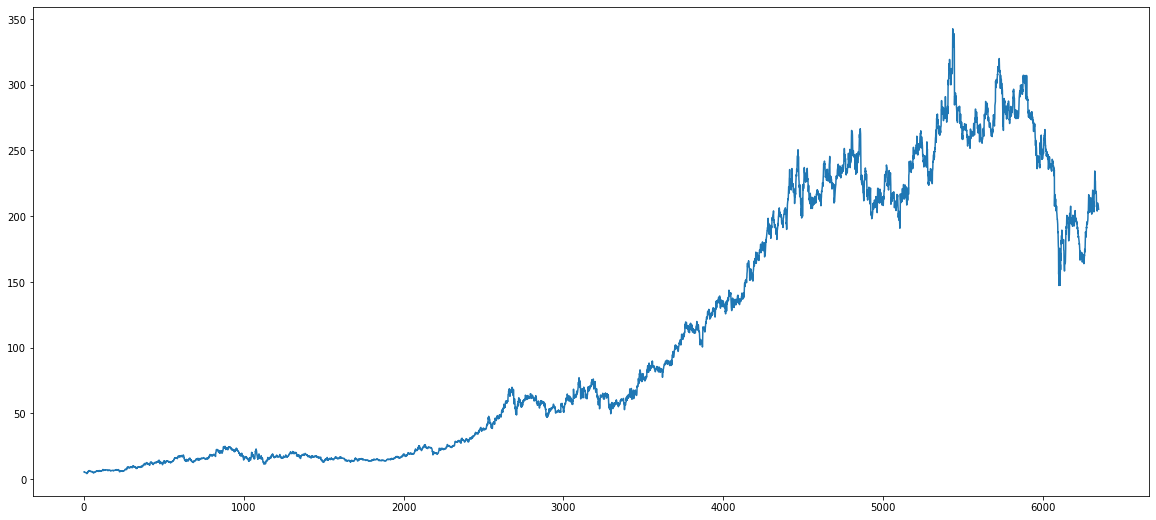

In [6]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [7]:
#columns for x and y
x  = df[['Open','High','Low','Volume']]
y = df['Close']

In [8]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume']] = scaler.fit_transform(df[['Open','High','Low','Volume']])
df.head()

,Open,High,Low,Volume,Close
0,0.004001,0.004044,0.004132,0.000761,5.372222
1,0.003758,0.003949,0.003405,0.005772,5.200000
2,0.002783,0.003058,0.002846,0.011714,5.297777
3,0.002978,0.003280,0.002975,0.009580,5.202222
4,0.003264,0.003125,0.003107,0.003870,5.042222


In [9]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4740, 4)
(1580, 4)
(4740,)
(1580,)


---
# Random Forest

In [10]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [11]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
2921,52.150002,52.122833,0.027169
2516,38.481110,38.167033,0.314077
1980,16.261110,16.025733,0.235377
2847,58.483334,58.843499,0.360165
3862,103.400002,104.652667,1.252665
2419,30.596666,31.746133,1.149467
3794,117.033333,115.211332,1.822001
1136,11.844444,11.975222,0.130778
3361,60.299999,60.170166,0.129833
303,9.472222,8.536188,0.936034


In [12]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9992029264001481
Mean Absolute Error: 1.599509211336682
Mean Squared  Error: 7.559154129719244
Root Mean Squared Error: 2.7493915926472248
Loss: 1.599509211336682


---
# k-NN

In [13]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [14]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
2921,52.150002,85.369604,33.219602
2516,38.481110,136.130397,97.649287
1980,16.261110,124.952779,108.691669
2847,58.483334,181.686666,123.203332
3862,103.400002,118.223014,14.823012
2419,30.596666,147.262222,116.665556
3794,117.033333,176.797378,59.764045
1136,11.844444,120.769046,108.924602
3361,60.299999,87.190158,26.890159
303,9.472222,11.962460,2.490238


In [15]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [16]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.185327635280651
Mean Absolute Error: 71.995119226085
Mean Squared  Error: 7726.054370989669
Root Mean Squared Error: 87.89797705857438
Loss: 71.995119226085


---
# Decision Tree

In [17]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [18]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
2921,52.150002,51.383331,0.766671
2516,38.481110,38.483334,0.002224
1980,16.261110,16.135555,0.125555
2847,58.483334,58.349998,0.133336
3862,103.400002,104.266663,0.866661
2419,30.596666,31.948889,1.352223
3794,117.033333,114.500000,2.533333
1136,11.844444,11.895555,0.051111
3361,60.299999,60.450001,0.150002
303,9.472222,8.318888,1.153334


In [19]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9985385755839763
Mean Absolute Error: 2.1625371430379747
Mean Squared  Error: 13.859613982586088
Root Mean Squared Error: 3.7228502498201683
Loss: 2.1625371430379747


---
# Linear Regression

In [20]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [21]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-4.77779810e-01  8.53765765e-01  6.21634795e-01 -1.81156445e-10]
0.0442084561105105


In [22]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
2921,52.150002,52.635837,0.485835
2516,38.481110,38.300980,0.180130
1980,16.261110,16.315857,0.054747
2847,58.483334,59.068615,0.585281
3862,103.400002,105.301271,1.901269
2419,30.596666,31.538494,0.941828
3794,117.033333,115.097022,1.936311
1136,11.844444,11.836329,0.008115
3361,60.299999,61.052782,0.752783
303,9.472222,8.678938,0.793284


In [23]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.999349567322392
Mean Absolute Error: 1.4462665554432337
Mean Squared  Error: 6.168465323601391
Root Mean Squared Error: 2.483639531735914
Loss: 1.4462665554432337
